In [22]:
import symfit
import numpy as np
import matplotlib.pyplot as plt

from symfit import parameters, Parameter, variables, Fit, ODEModel, D

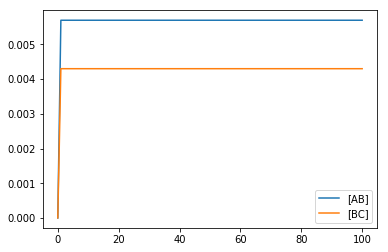

In [146]:
# Here we describe a model with A+B->AB and B+C->BC
A, B, C, AB, BC, t = variables('A, B, C, AB, BC, t')

kAB = Parameter('kAB',1.5e3)  # Rate constant for formation of AB
kBC = Parameter('kBC',1e3)    # rate constant for formation of BC

conc0 = 10e-3 # initial concentration

# here's a list of rate expressions for each component in the mixture
model_dict = {
    D(AB,t): kAB * A * B,
    D(BC,t): kBC * B * C,
    D(A,t): -kAB*A*B,
    D(B,t): -(kAB*A*B + kBC*B*C),
    D(C,t): -kBC*B*C,
}

# here we define the ODE model and specify the start concentrations of each reagent

ode_model = ODEModel(model_dict, initial={t: 0.0, A:conc0, B:conc0, C:conc0, AB:0, BC:0})

# and then we fit the ODE model
fit = Fit(ode_model, t=tdata, A=None, B=None, AB=None, BC=None, C=None)
fit_result = fit.execute()


# Generate some data
tvec = np.linspace(0, 100, 100)
ans = ode_model(t=tvec, **fit_result.params)._asdict()
# and plot it
plt.plot(tvec, ans[AB], label='[AB]')
plt.plot(tvec, ans[BC], label='[BC]')
#plt.scatter(tdata, adata)
plt.legend()
plt.show()

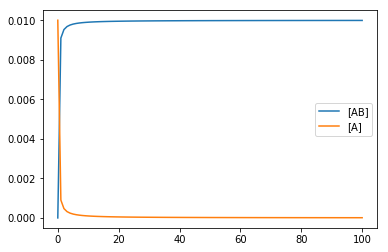

In [145]:
# Here we describe a model with A+B->AB
A, B, AB, t = variables('A, B, AB, t')

kAB = Parameter('kAB',1e3)  # Rate constant for formation of AB


conc0 = 10e-3 # initial concentration

# here's a list of rate expressions for each component in the mixture
model_dict = {
    D(AB,t): kAB * A * B,
    D(A,t): -kAB*A*B,
    D(B,t): -(kAB*A*B),
}
# here we define the ODE model and specify the start concentrations of each reagent

ode_model = ODEModel(model_dict, initial={t: 0.0, A:conc0, B:conc0, AB:0, })

# and then we fit the ODE model
fit = Fit(ode_model, t=tdata, A=None, B=None, AB=None)
fit_result = fit.execute()


# Generate some data
tvec = np.linspace(0, 100, 100)
ans = ode_model(t=tvec, **fit_result.params)._asdict()
# and plot it
plt.plot(tvec, ans[AB], label='[AB]')
plt.plot(tvec, ans[A], label='[A]')
#plt.plot(tvec, BCres, label='[BC]')
#plt.scatter(tdata, adata)
plt.legend()
plt.show()


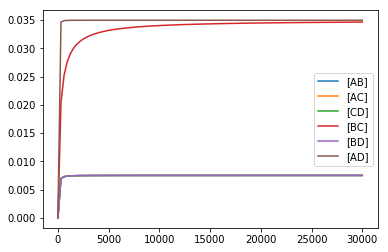

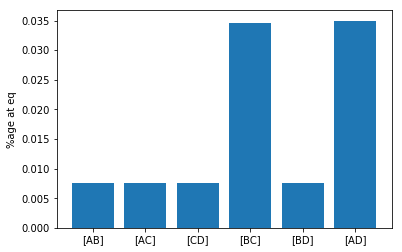

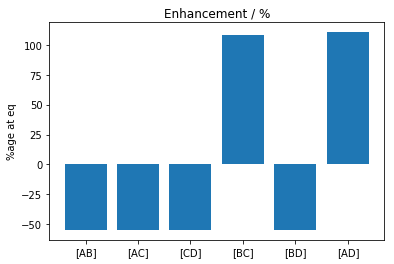

In [227]:
# Here we describe a model with A+B->AB
A, B, C, Di, AB, AC, CD, BD, AD, BC, t = variables('A, B, C, Di, AB, AC, CD, BD, AD, BC, t')

kAB = Parameter('kAB',1e-1)  # Rate constant for formation of AB
kAC = Parameter('kAC',1e-1)  # Rate constant for formation of AC
kBD = Parameter('kBD',1e-1)  # Rate constant for formation of BD
kCD = Parameter('kCD',1e-1)  # Rate constant for formation of CD
kBC = Parameter('kBC',1e-1)  # Rate constant for formation of BC  ## cross-connection
kAD = Parameter('kAD',10e-1)  # Rate constant for formation of AD  ## cross-connection


conc0 = 500e-4 # initial concentration 50 mM

# here's a list of rate expressions for each component in the mixture
# here I'm calling the concentration of D as'Di' to avoid confusion
model_dict = {
    D(AB,t): kAB * A * B,
    D(AC,t): kAC * A * C,
    D(BD,t): kBD * B * Di,
    D(CD,t): kCD * C * Di,
    D(BC,t): kBC * B * C,
    D(AD,t): kAD * A * Di,
    D(A,t): -(kAB*A*B + kAC*A*C + kAD*A*Di),
    D(B,t): -(kAB*A*B + kBD*B*Di + kBC*B*C),
    D(C,t): -(kAC*A*C+kCD*C*Di+kBC*B*C),
    D(Di,t): -(kBD*B*Di+kCD*C*Di+kAD*A*Di)
}
# here we define the ODE model and specify the start concentrations of each reagent

ode_model = ODEModel(model_dict, initial={t: 0.0, A:conc0, B:conc0, C:conc0, Di:conc0, AB:0, BC:0, AC:0, BD:0, CD:0, AD:0 })

# and then we fit the ODE model
fit = Fit(ode_model, t=tdata, A=None, B=None, C=None, Di=None, AB=None, BC=None, AC=None, BD=None, CD=None, AD=None)
fit_result = fit.execute()


# Generate some data
tvec = np.linspace(0, 30000, 100)
ans = ode_model(t=tvec, **fit_result.params)._asdict()

# and plot it
plt.plot(tvec, ans[AB], label='[AB]')
plt.plot(tvec, ans[AC], label='[AC]')
plt.plot(tvec, ans[CD], label='[CD]')
plt.plot(tvec, ans[BC], label='[BC]')
plt.plot(tvec, ans[BD], label='[BD]')
plt.plot(tvec, ans[AD], label='[AD]')

#plt.plot(tvec, BCres, label='[BC]')
#plt.scatter(tdata, adata)
plt.legend()
plt.show()

res = [ans[AB][-1],ans[AC][-1],ans[CD][-1],ans[BC][-1],ans[BD][-1],ans[AD][-1]]
resNorm = res/sum(res)
plt.bar([1,2,3,4,5,6],res)
plt.xticks([1,2,3,4,5,6],('[AB]','[AC]','[CD]','[BC]','[BD]','[AD]'))
plt.ylabel('%age at eq')
plt.show()

# enhancement, in percent, compared to equal concentrations everywhere
resEnh = 100*((np.array(resNorm)) - 1/len(resNorm))/(1/len(resNorm))

plt.bar([1,2,3,4,5,6],resEnh)
plt.xticks([1,2,3,4,5,6],('[AB]','[AC]','[CD]','[BC]','[BD]','[AD]'))
plt.ylabel('%age at eq')
plt.title('Enhancement / %')
plt.show()